# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing Essential Libraries for Data Analysis 

In [1]:
import numpy as np
import pandas as pd

# Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries for Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings(action='ignore')

# Data Exploration and Preparation

### Read the Dataset & Understanding Data

In [2]:
# read the given dataset
df = pd.read_csv('day.csv')

In [3]:
# Displaying the First 5 Rows of the DataFrame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the shape of the df
df.shape

(730, 16)

In [5]:
# Null values and datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning and quality check

In [7]:
# Sum of null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Dropping duplicates in the data
df.drop_duplicates(inplace = True)

In [9]:
# Recheck the shape
df.shape

(730, 16)

In [10]:
# Columns in the df
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Dropping columns

Columns :  ["instant", "dteday", "casual", and "registered"]
* We already have an indexing, so not needed **instant**.
* We have yr and mnth, so no need for **dteday** 
* **casual** and **registered** are there in total count column cnt. 

In [11]:
df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)
df.shape

(730, 12)

### Convert to categorical

In [12]:
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [14]:
df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [15]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [16]:
labels_season= {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}


labels_weathersit = { 
    1: 'Good', 
    2: 'Moderate', 
    3: 'Bad', 
    4: 'Severe' }

df['season'] = df['season'].replace(labels_season)
df['weathersit'] = df['weathersit'].replace(labels_weathersit)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
import calendar

df['mnth'] = df['mnth'].apply(lambda x: calendar.month_name[x])
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sunday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Monday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Check the value counts
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [19]:
df['weathersit'].value_counts()

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

## EDA

### Univariate Analysis

#### Visualizing Categorical Variables

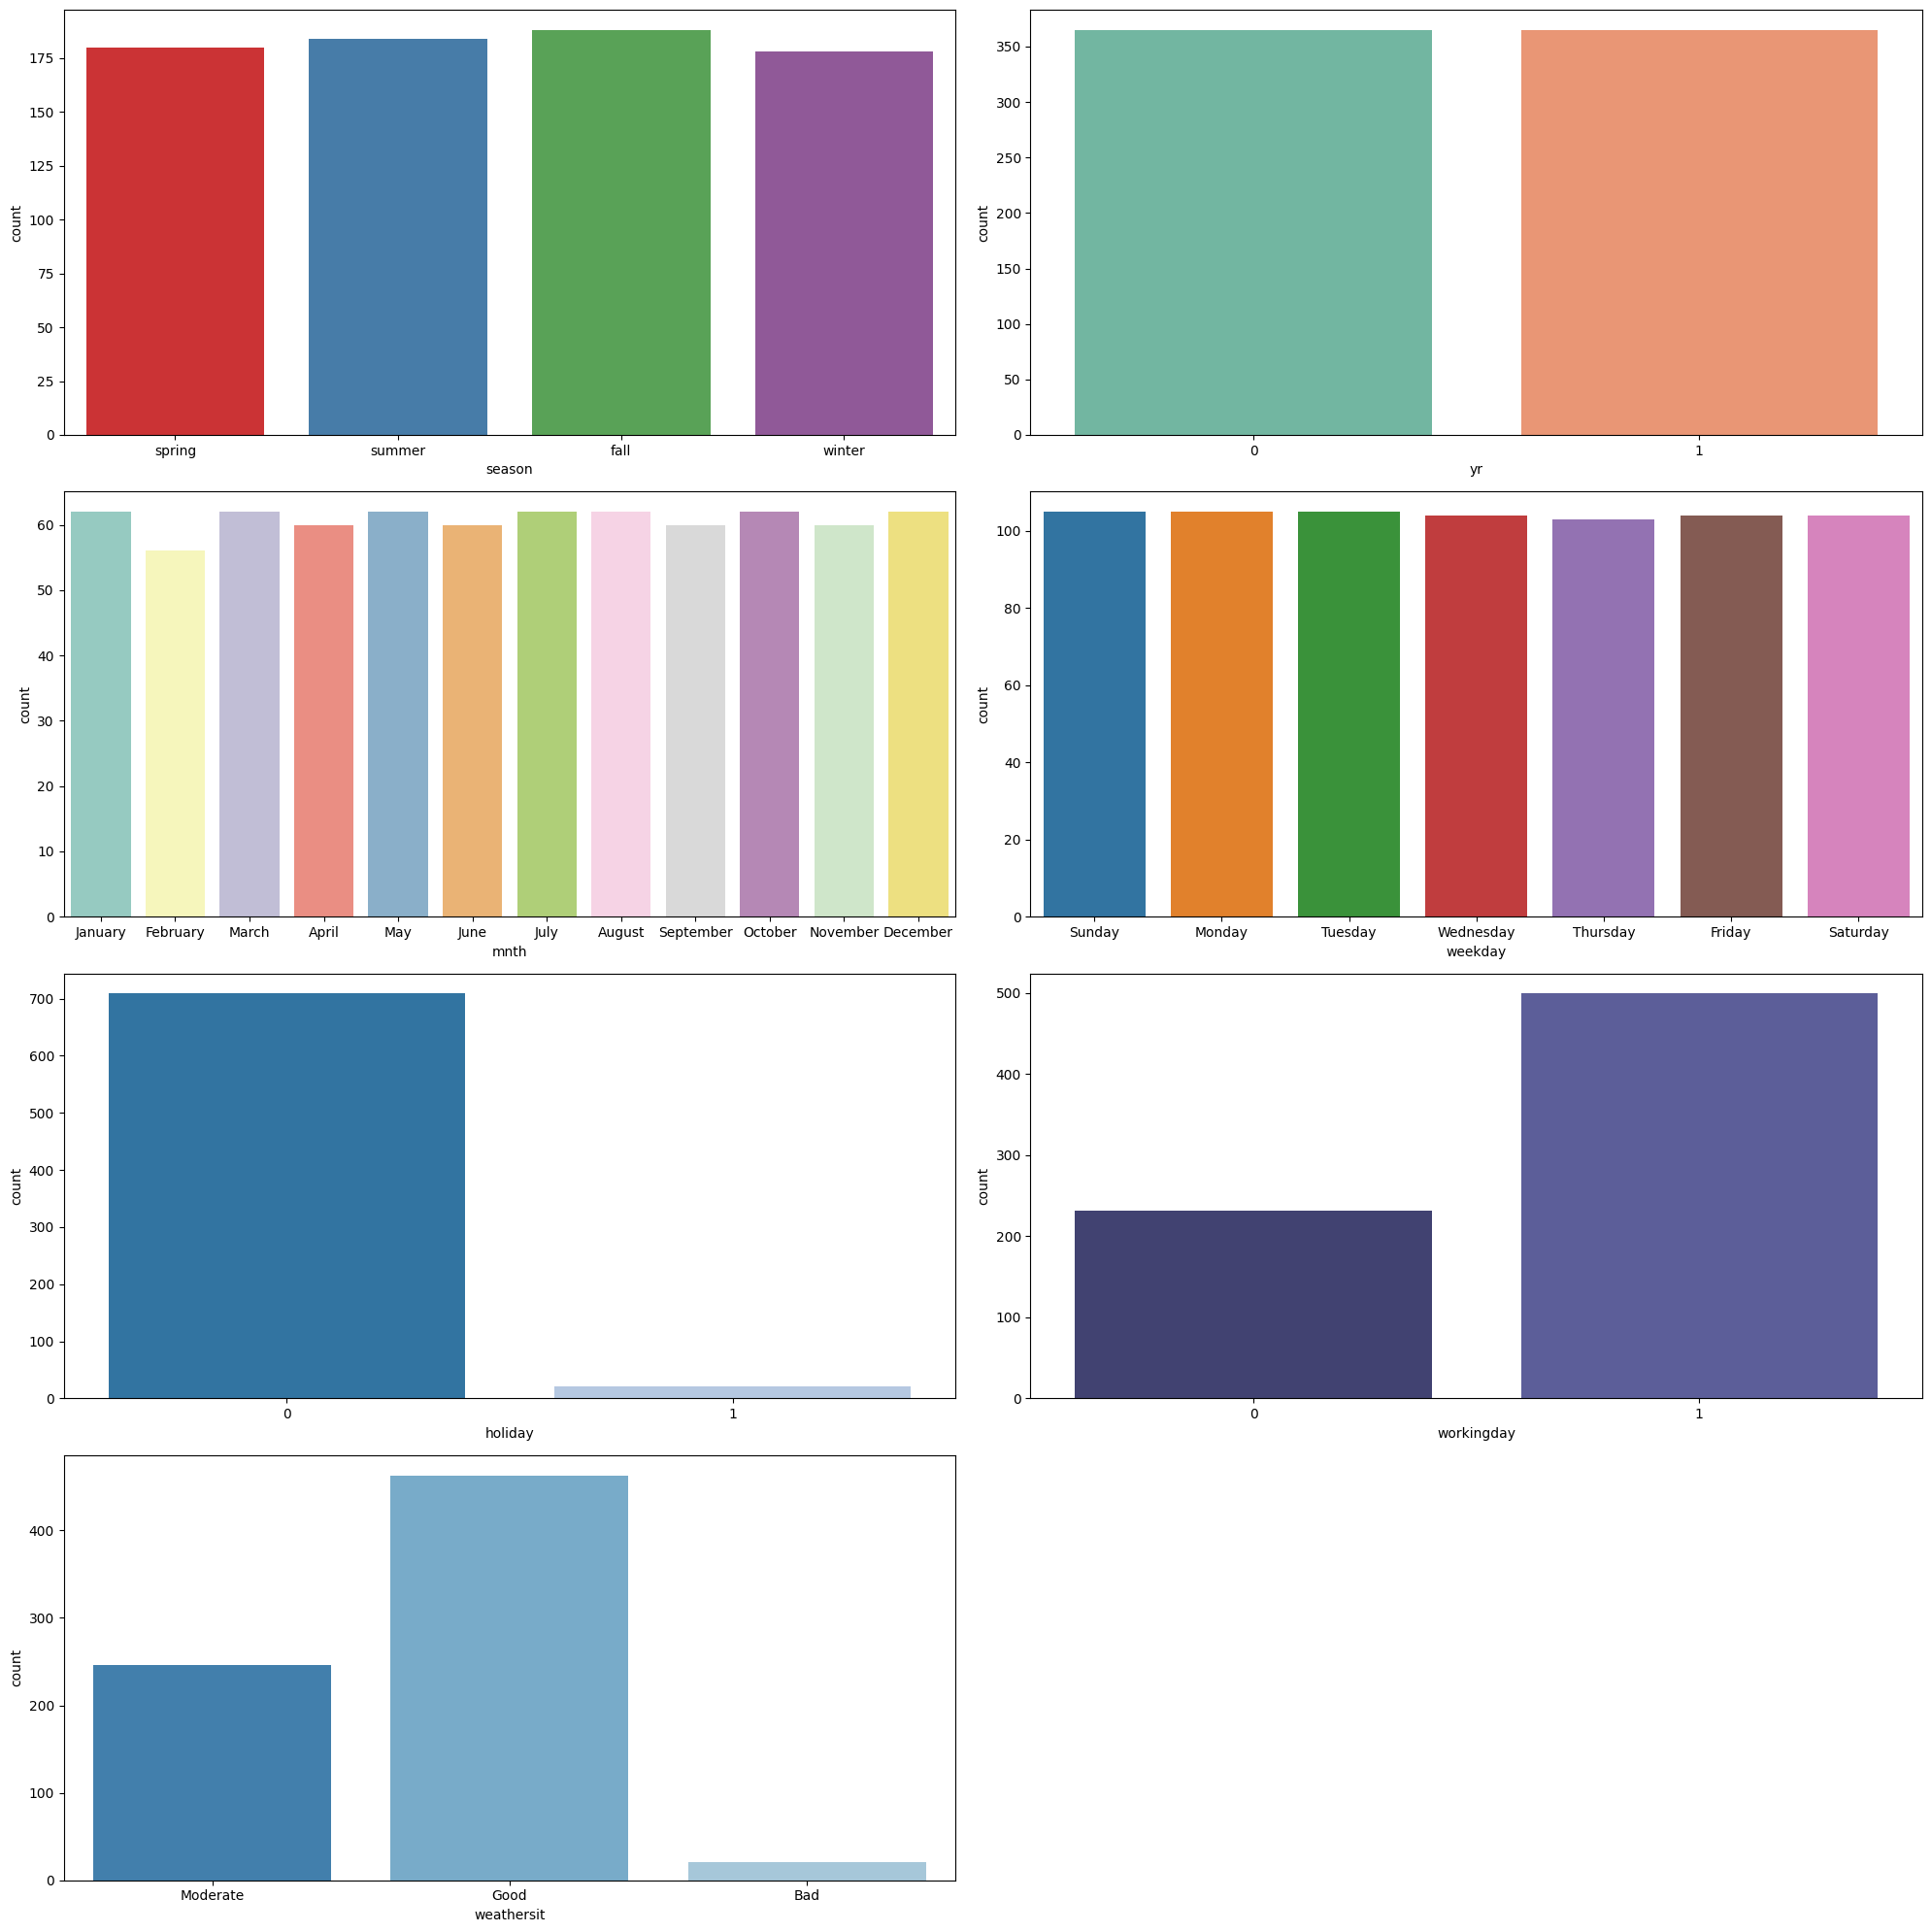

In [20]:
# Configuration for plotting categorical variables
plot_config = {
    'season': {'colour': 'Set1'},
    'yr': {'colour': 'Set2'},
    'mnth': {'colour': 'Set3'},
    'weekday': {'colour': 'tab10'},
    'holiday': {'colour': 'tab20'},
    'workingday': {'colour': 'tab20b'},
    'weathersit': {'colour': 'tab20c'}
}

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, (category, config) in enumerate(plot_config.items()):
    sns.countplot(data=df, x=category, palette=config['colour'], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels())

# Hide any remaining empty subplots
for j in range(len(plot_config), 8):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


#### Valuable insights
* When there is favorable weather Bike rentals are high.
* On working days and non-holidays bike rentals are high .

####  Visualizing numerical Variables

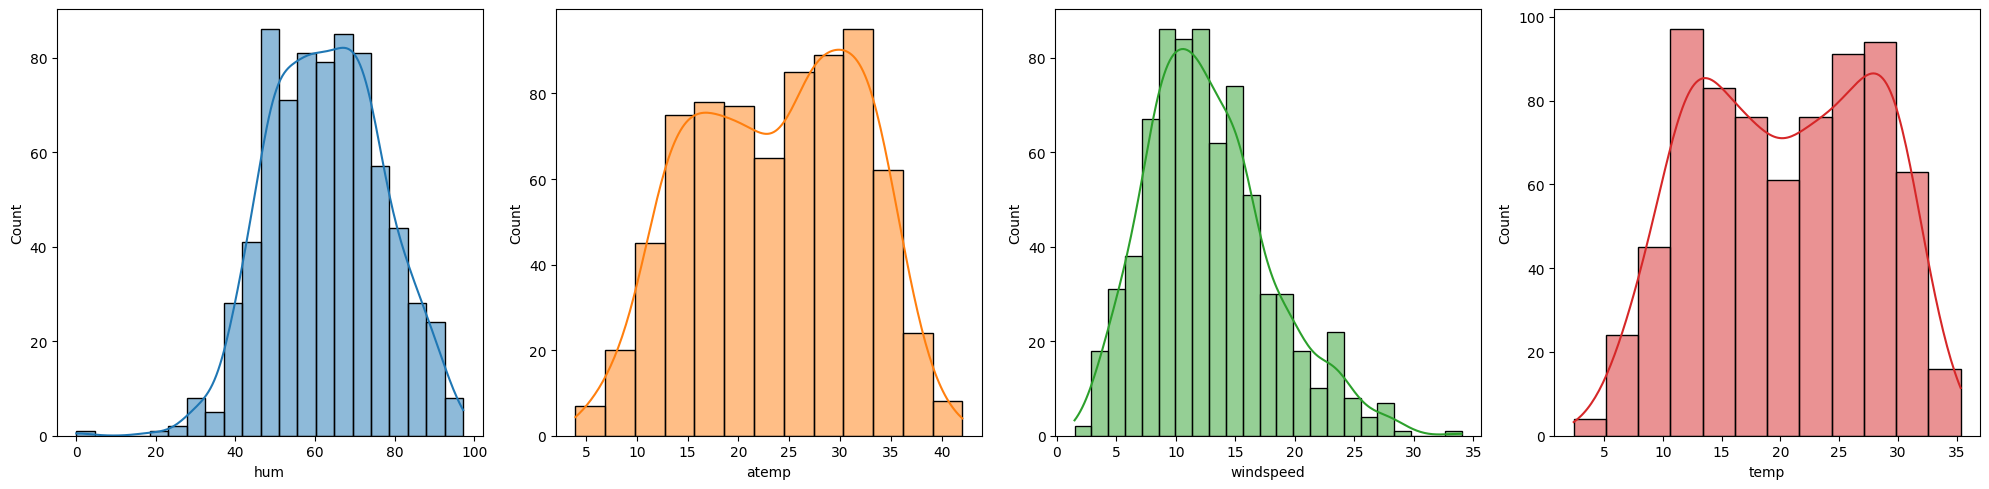

In [21]:
# Configuration for visualizations
plot_config_numeric =   {
    'hum': { 'color': '#1f77b4' },
    'atemp': { 'color': '#ff7f0e' },
    'windspeed': { 'color': '#2ca02c' },
    'temp': { 'color': '#d62728' }
}

# Creating subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting histograms with KDE
for idx, (variable, config) in enumerate(plot_config_numeric.items()):
    sns.histplot(data=df, x=variable.lower(), ax=ax[idx], color=config['color'], kde=True)

plt.tight_layout()
plt.show()

#### Valuable insights
* Avg Bike rentals at 60 hum and peak count is 80(50 hum).
* Avg Bike rentals at 25 atemp and peak count is 95(31.5 atemp).
* Avg Bike rentals at 12 windspeed and peak count is 92(9 windspeed).
* Avg Bike rentals at 20 temp and peak count is 95(12 temp).

### Bivariate Analysis

#### Pair plot
Numerical Variables vs count

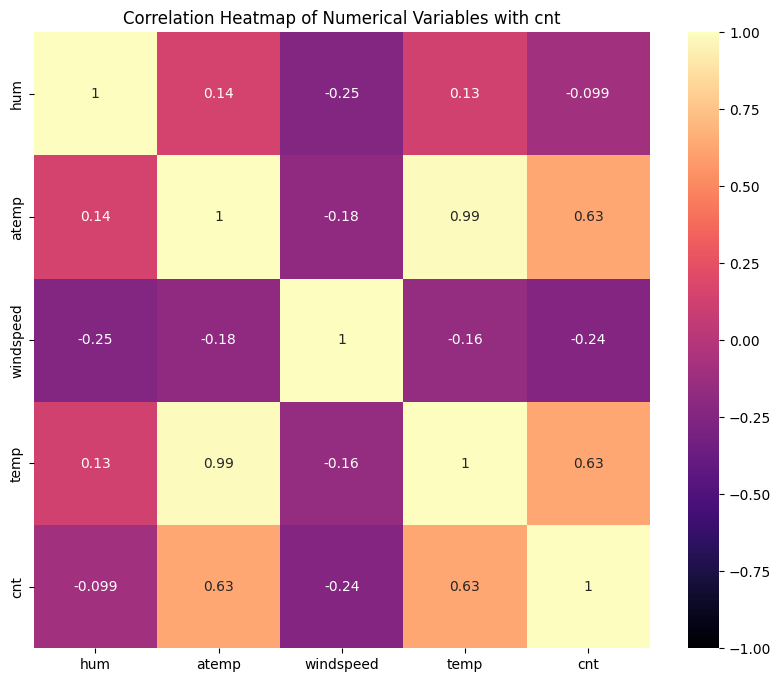

In [22]:
# Calculating correlations
correlation_matrix = df[list(plot_config_numeric.keys()) + ["cnt"]].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap of Numerical Variables with cnt')
plt.show()

#### Valuable insights
* **windspeed** & **hum** have a  negative correlation with cnt, which indicates unfavorable for biking.
* **atemp** & **temp** shows a strong correlation with cnt, which indicates unfavorable for biking.

#### For categorical variables

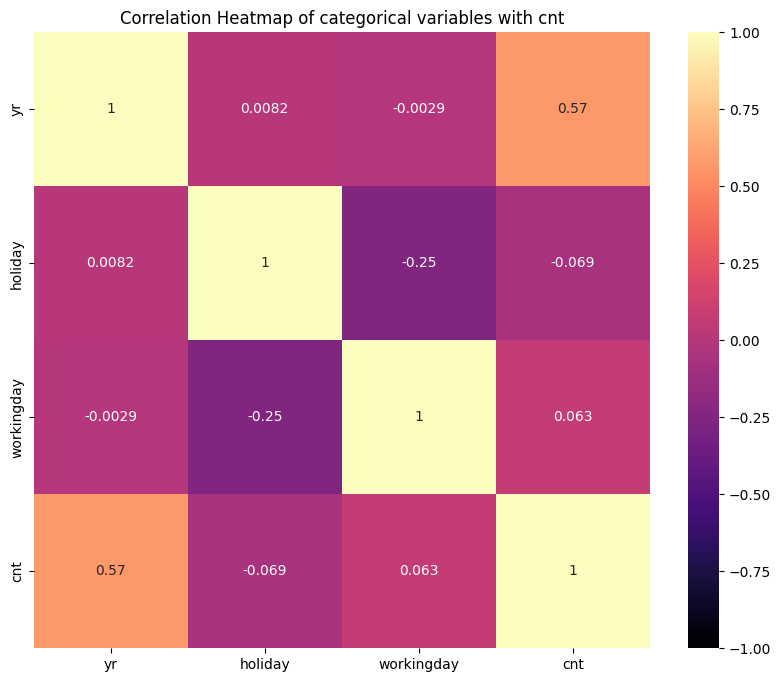

In [23]:
# Calculating correlations
correlation_matrix = df[list(plot_config.keys()) + ["cnt"]].corr(numeric_only = True)

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap of categorical variables with cnt')
plt.show()

#### Valuable insights
* Best positive correlation with cnt is **yr** .

### Multivariate Analysis

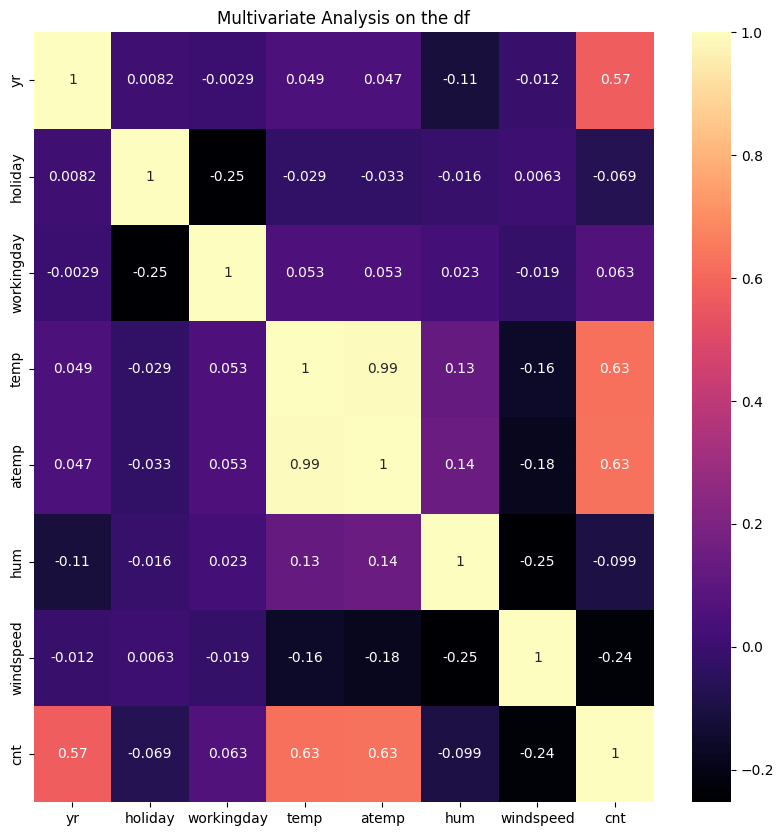

In [24]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma')

plt.title("Multivariate Analysis on the df")
plt.show()

#### Valuable insights
* The high correlation observed on temp and atemp with cnt
* Negative correlation on certain variables, specifically holiday, hum, and windspeed with cnt.
* Positive correlation on o yr, workingday, temp, and atemp with cnt.

### Data Preprocessing

In [25]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [26]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [27]:
# Categorical variables - season, mnth, weekday, and weathersit have more than 2 unique values.
# Dummy variables will be created for these.
categorical_columns_dummpy = ['season', 'mnth', 'weekday', 'weathersit']
df = pd.get_dummies(df, columns =categorical_columns_dummpy , drop_first = True, prefix = '', prefix_sep = '')
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,False,True,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,True,False,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,False,True,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,True,False,False,True,False


In [28]:
df.shape

(730, 30)

## Model building and Evaluation

In [29]:
# Separate feature variables (X) and dependent variable (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

In [30]:
# Splitting the data into a 70% & 30% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# Checking shape and size for train set
print(X_train.shape)
print(y_train.shape)

(511, 29)
(511,)


In [32]:
# Checking shape and size for test set
print(X_test.shape)
print(y_test.shape)

(219, 29)
(219,)


In [33]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Good', 'Moderate'],
      dtype='object')

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,False,False,True,...,True,False,False,False,False,False,False,True,True,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,False,False,False,...,False,False,False,False,False,False,False,True,True,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,True,False,False,...,False,False,False,False,True,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,True,False,False,...,False,False,True,False,False,False,False,False,True,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [35]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,False,False,False,...,False,False,False,False,False,False,True,False,False,True
535,1,0,1,32.082500,36.04875,59.2083,7.625404,False,True,False,...,False,False,False,False,False,True,False,False,True,False
299,0,0,1,19.270000,22.85230,81.2917,13.250121,False,False,True,...,True,False,False,False,False,False,False,False,False,True
221,0,0,1,31.433347,34.24915,42.4167,13.417286,False,False,False,...,False,False,False,False,False,True,False,False,True,False
152,0,0,1,29.315000,32.19710,30.5000,19.583229,False,True,False,...,False,False,False,False,False,False,False,False,True,False


#### Feature Scaling with StandardScaler

StandardScaler is a technique used to transform the features (or variables) in a dataset so that they all have a similar scale. This process makes it easier for machine learning algorithms to compare and evaluate these features.

In [36]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


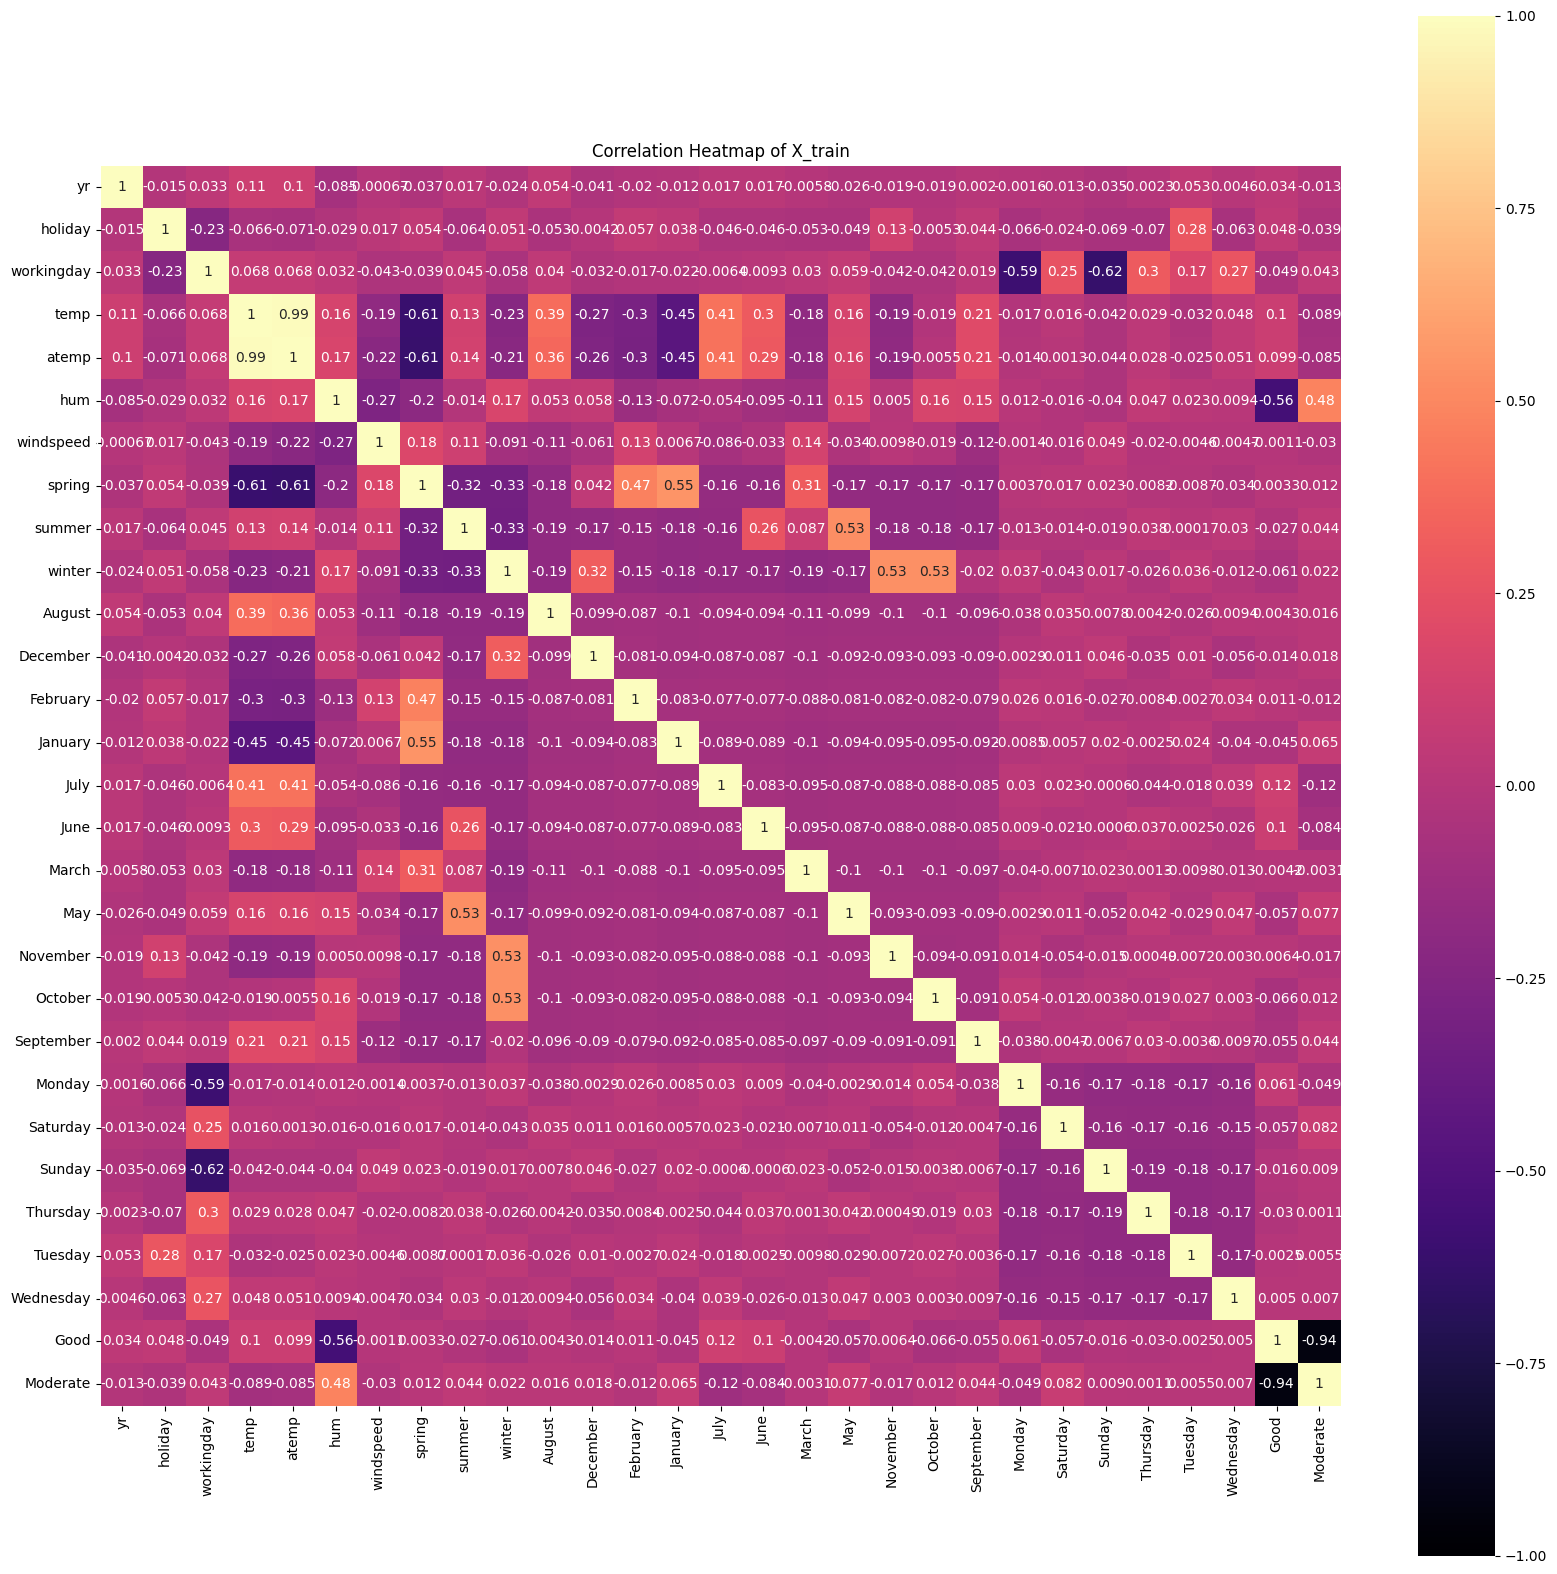

In [37]:
# Calculating correlations
correlation_matrix = X_train_scaled.corr()

# Plotting correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap of X_train')
plt.show()

### Feature Selection with RFE

RFE is a technique used in machine learning to select the most important features from a dataset.

We have a  dataset with many different attributes or features that describe your data. Some of these features may not be very useful for making predictions, while others are crucial. RFE helps you find out which features are most important.

Here’s how RFE works:

* First, it builds a model using all the features in your dataset.
* Then, it identifies which feature is the least important for the model's performance.
* Next, it removes that least important feature from the dataset.
* It repeats this process, building new models each time, until only the most important features are left.

In [38]:
# Selecting 15 Features using RFE

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)

In [39]:
rfe = rfe.fit(X_train_scaled, y_train)
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True])

In [40]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 7),
 ('December', False, 13),
 ('February', False, 11),
 ('January', False, 6),
 ('July', True, 1),
 ('June', False, 10),
 ('March', False, 2),
 ('May', False, 4),
 ('November', False, 3),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 8),
 ('Sunday', True, 1),
 ('Thursday', False, 9),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [41]:
# Columns which are selected
selected_features = X_train_scaled.columns[rfe.support_]

In [42]:
# Columns which are rejected 
rejected_features = X_train_scaled.columns[~rfe.support_]

### Manual Feature Elimination 

In [43]:

def fit_ols_summary(y, X):
    X_train_sm = sm.add_constant(X)
    lm = sm.OLS(y, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

def calculate_vif(X):
    X_const = sm.add_constant(X)
    vif_values = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    vif_df = pd.DataFrame({'feature': X_const.columns, 'VIF': vif_values}).sort_values(by='VIF', ascending=False)
    print(vif_df)


In [44]:
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'September', 'Monday', 'Sunday', 'Good',
       'Moderate'],
      dtype='object')

#### Model 1

Using features selected by RFE : ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'August', 'January', 'September', 'Monday', 'Sunday',
       'cloudy', 'light snow/rain']

In [45]:
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.43e-190
Time:                        19:42:13   Log-Likelihood:                -4119.9
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.473    130.285      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e977690>,
 'X_train_sm':      const       yr   holiday  workingday      temp       hum  windspeed  \
 653    1.0  0.98254 -0.161569    0.690564 -0.121991 -0.514975  -0.118309   
 576    1.0  0.98254 -0.161569    0.690564  1.232298  0.517177  -0.331370   
 426    1.0  0.98254 -0.161569   -1.448092 -0.421405 -0.069675  -0.386500   
 728    1.0  0.98254 -0.161569   -1.448092 -1.296629 -1.045794   2.019569   
 482    1.0  0.98254 -0.161569   -1.448092 -0.628694 -1.001559  -0.781062   
 ..     ...      ...       ...         ...       ...       ...        ...   
 578    1.0  0.98254 -0.161569    0.690564  1.448801  0.201630  -0.788939   
 53     1.0 -1.01777 -0.161569    0.690564 -1.485091 -1.472501  -1.235979   
 350    1.0 -1.01777 -0.161569   -1.448092 -1.282810 -0.497281   0.654804   
 79     1.0 -1.01777 -0.161569    0.690564 -0.331480  0.752323   1.233453   
 520    1.0  0.98254 -0.161569    0.690564  0.2787

In [46]:
calculate_vif(X_train_scaled[selected_features])

       feature        VIF
2      holiday        inf
3   workingday        inf
12      Monday        inf
13      Sunday        inf
14        Good  10.260692
15    Moderate   8.873453
7       spring   5.019121
4         temp   3.605700
9       winter   3.491211
8       summer   2.620668
5          hum   1.905439
10        July   1.487601
11   September   1.296516
6    windspeed   1.185473
1           yr   1.034805
0        const   1.000000


#### Model 2 
There are 4 high p value and High vif values columns => holiday, workingday, Monday, Sunday.

Starting with Dropping **holiday** because of high p-value

In [47]:
selected_features = selected_features.drop("holiday")

In [48]:
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.31e-192
Time:                        19:42:13   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.266    131.072      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e82af50>,
 'X_train_sm':      const       yr  workingday      temp       hum  windspeed    spring  \
 653    1.0  0.98254    0.690564 -0.121991 -0.514975  -0.118309 -0.566051   
 576    1.0  0.98254    0.690564  1.232298  0.517177  -0.331370 -0.566051   
 426    1.0  0.98254   -1.448092 -0.421405 -0.069675  -0.386500  1.766626   
 728    1.0  0.98254   -1.448092 -1.296629 -1.045794   2.019569  1.766626   
 482    1.0  0.98254   -1.448092 -0.628694 -1.001559  -0.781062 -0.566051   
 ..     ...      ...         ...       ...       ...        ...       ...   
 578    1.0  0.98254    0.690564  1.448801  0.201630  -0.788939 -0.566051   
 53     1.0 -1.01777    0.690564 -1.485091 -1.472501  -1.235979  1.766626   
 350    1.0 -1.01777   -1.448092 -1.282810 -0.497281   0.654804 -0.566051   
 79     1.0 -1.01777    0.690564 -0.331480  0.752323   1.233453 -0.566051   
 520    1.0  0.98254    0.690564  0.278768 -0.1257

In [49]:
calculate_vif(X_train_scaled[selected_features])

       feature        VIF
13        Good  10.263519
2   workingday   9.079375
14    Moderate   8.876476
12      Sunday   6.060785
11      Monday   5.739480
6       spring   5.021533
3         temp   3.615446
8       winter   3.495427
7       summer   2.623422
4          hum   1.906795
9         July   1.487669
10   September   1.296755
5    windspeed   1.196046
1           yr   1.035215
0        const   1.000000


#### Model 3
Removing Good because it has very high VIF 

In [50]:
selected_features = selected_features.drop("Good")
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.06e-175
Time:                        19:42:13   Log-Likelihood:                -4158.7
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     497   BIC:                             8405.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.157    120.874      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e945a90>,
 'X_train_sm':      const       yr  workingday      temp       hum  windspeed    spring  \
 653    1.0  0.98254    0.690564 -0.121991 -0.514975  -0.118309 -0.566051   
 576    1.0  0.98254    0.690564  1.232298  0.517177  -0.331370 -0.566051   
 426    1.0  0.98254   -1.448092 -0.421405 -0.069675  -0.386500  1.766626   
 728    1.0  0.98254   -1.448092 -1.296629 -1.045794   2.019569  1.766626   
 482    1.0  0.98254   -1.448092 -0.628694 -1.001559  -0.781062 -0.566051   
 ..     ...      ...         ...       ...       ...        ...       ...   
 578    1.0  0.98254    0.690564  1.448801  0.201630  -0.788939 -0.566051   
 53     1.0 -1.01777    0.690564 -1.485091 -1.472501  -1.235979  1.766626   
 350    1.0 -1.01777   -1.448092 -1.282810 -0.497281   0.654804 -0.566051   
 79     1.0 -1.01777    0.690564 -0.331480  0.752323   1.233453 -0.566051   
 520    1.0  0.98254    0.690564  0.278768 -0.1257

In [51]:
calculate_vif(X_train_scaled[selected_features])

       feature       VIF
2   workingday  9.059433
12      Sunday  6.045144
11      Monday  5.738389
6       spring  4.996466
3         temp  3.555643
8       winter  3.491756
7       summer  2.616302
4          hum  1.607793
9         July  1.485507
13    Moderate  1.400036
10   September  1.296617
5    windspeed  1.146449
1           yr  1.035158
0        const  1.000000


#### Model 4
Removing **workingday** because it has very high VIF 

In [52]:
selected_features = selected_features.drop("workingday")
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.44e-174
Time:                        19:42:13   Log-Likelihood:                -4164.3
No. Observations:                 511   AIC:                             8355.
Df Residuals:                     498   BIC:                             8410.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.530    119.671      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e965290>,
 'X_train_sm':      const       yr      temp       hum  windspeed    spring    summer  \
 653    1.0  0.98254 -0.121991 -0.514975  -0.118309 -0.566051 -0.572078   
 576    1.0  0.98254  1.232298  0.517177  -0.331370 -0.566051 -0.572078   
 426    1.0  0.98254 -0.421405 -0.069675  -0.386500  1.766626 -0.572078   
 728    1.0  0.98254 -1.296629 -1.045794   2.019569  1.766626 -0.572078   
 482    1.0  0.98254 -0.628694 -1.001559  -0.781062 -0.566051  1.748015   
 ..     ...      ...       ...       ...        ...       ...       ...   
 578    1.0  0.98254  1.448801  0.201630  -0.788939 -0.566051 -0.572078   
 53     1.0 -1.01777 -1.485091 -1.472501  -1.235979  1.766626 -0.572078   
 350    1.0 -1.01777 -1.282810 -0.497281   0.654804 -0.566051 -0.572078   
 79     1.0 -1.01777 -0.331480  0.752323   1.233453 -0.566051  1.748015   
 520    1.0  0.98254  0.278768 -0.125708   0.228682 -0.566051  1.748015 

In [53]:
calculate_vif(X_train_scaled[selected_features])

      feature       VIF
5      spring  4.990847
2        temp  3.555525
7      winter  3.485524
6      summer  2.616243
3         hum  1.607540
8        July  1.485277
12   Moderate  1.398250
9   September  1.292967
4   windspeed  1.146223
10     Monday  1.040661
11     Sunday  1.038823
1          yr  1.034948
0       const  1.000000


#### Model 5
Removing **spring** because it has very high VIF 

In [54]:
selected_features = selected_features.drop("spring")
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.58e-174
Time:                        19:42:13   Log-Likelihood:                -4166.3
No. Observations:                 511   AIC:                             8357.
Df Residuals:                     499   BIC:                             8407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.636    119.335      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32ef2d190>,
 'X_train_sm':      const       yr      temp       hum  windspeed    summer    winter  \
 653    1.0  0.98254 -0.121991 -0.514975  -0.118309 -0.572078  1.738857   
 576    1.0  0.98254  1.232298  0.517177  -0.331370 -0.572078 -0.575091   
 426    1.0  0.98254 -0.421405 -0.069675  -0.386500 -0.572078 -0.575091   
 728    1.0  0.98254 -1.296629 -1.045794   2.019569 -0.572078 -0.575091   
 482    1.0  0.98254 -0.628694 -1.001559  -0.781062  1.748015 -0.575091   
 ..     ...      ...       ...       ...        ...       ...       ...   
 578    1.0  0.98254  1.448801  0.201630  -0.788939 -0.572078 -0.575091   
 53     1.0 -1.01777 -1.485091 -1.472501  -1.235979 -0.572078 -0.575091   
 350    1.0 -1.01777 -1.282810 -0.497281   0.654804 -0.572078  1.738857   
 79     1.0 -1.01777 -0.331480  0.752323   1.233453  1.748015 -0.575091   
 520    1.0  0.98254  0.278768 -0.125708   0.228682  1.748015 -0.575091 

In [55]:
calculate_vif(X_train_scaled[selected_features])

      feature       VIF
3         hum  1.594122
2        temp  1.580080
7        July  1.428864
11   Moderate  1.391823
5      summer  1.328150
6      winter  1.285682
8   September  1.187181
4   windspeed  1.136372
9      Monday  1.040476
10     Sunday  1.038823
1          yr  1.030618
0       const  1.000000


#### Model 6
Removing **Sunday** because it has very high P-value

In [56]:
selected_features = selected_features.drop("Sunday")
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.62e-175
Time:                        19:42:13   Log-Likelihood:                -4166.7
No. Observations:                 511   AIC:                             8355.
Df Residuals:                     500   BIC:                             8402.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.632    119.348      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e81c4d0>,
 'X_train_sm':      const       yr      temp       hum  windspeed    summer    winter  \
 653    1.0  0.98254 -0.121991 -0.514975  -0.118309 -0.572078  1.738857   
 576    1.0  0.98254  1.232298  0.517177  -0.331370 -0.572078 -0.575091   
 426    1.0  0.98254 -0.421405 -0.069675  -0.386500 -0.572078 -0.575091   
 728    1.0  0.98254 -1.296629 -1.045794   2.019569 -0.572078 -0.575091   
 482    1.0  0.98254 -0.628694 -1.001559  -0.781062  1.748015 -0.575091   
 ..     ...      ...       ...       ...        ...       ...       ...   
 578    1.0  0.98254  1.448801  0.201630  -0.788939 -0.572078 -0.575091   
 53     1.0 -1.01777 -1.485091 -1.472501  -1.235979 -0.572078 -0.575091   
 350    1.0 -1.01777 -1.282810 -0.497281   0.654804 -0.572078  1.738857   
 79     1.0 -1.01777 -0.331480  0.752323   1.233453  1.748015 -0.575091   
 520    1.0  0.98254  0.278768 -0.125708   0.228682  1.748015 -0.575091 

In [57]:
calculate_vif(X_train_scaled[selected_features])

      feature       VIF
3         hum  1.592492
2        temp  1.579134
7        July  1.428232
10   Moderate  1.391409
5      summer  1.328073
6      winter  1.284925
8   September  1.187164
4   windspeed  1.134771
1          yr  1.029392
9      Monday  1.008539
0       const  1.000000


#### Model 7
Removing **Moderate** because it has very high P-value

In [58]:
selected_features = selected_features.drop("Moderate")
fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.56e-176
Time:                        19:42:13   Log-Likelihood:                -4168.8
No. Observations:                 511   AIC:                             8358.
Df Residuals:                     501   BIC:                             8400.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.746    118.986      0.0

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x32e7cb250>,
 'X_train_sm':      const       yr      temp       hum  windspeed    summer    winter  \
 653    1.0  0.98254 -0.121991 -0.514975  -0.118309 -0.572078  1.738857   
 576    1.0  0.98254  1.232298  0.517177  -0.331370 -0.572078 -0.575091   
 426    1.0  0.98254 -0.421405 -0.069675  -0.386500 -0.572078 -0.575091   
 728    1.0  0.98254 -1.296629 -1.045794   2.019569 -0.572078 -0.575091   
 482    1.0  0.98254 -0.628694 -1.001559  -0.781062  1.748015 -0.575091   
 ..     ...      ...       ...       ...        ...       ...       ...   
 578    1.0  0.98254  1.448801  0.201630  -0.788939 -0.572078 -0.575091   
 53     1.0 -1.01777 -1.485091 -1.472501  -1.235979 -0.572078 -0.575091   
 350    1.0 -1.01777 -1.282810 -0.497281   0.654804 -0.572078  1.738857   
 79     1.0 -1.01777 -0.331480  0.752323   1.233453  1.748015 -0.575091   
 520    1.0  0.98254  0.278768 -0.125708   0.228682  1.748015 -0.575091 

In [59]:
calculate_vif(X_train_scaled[selected_features])

     feature       VIF
2       temp  1.526811
7       July  1.428123
5     summer  1.326417
6     winter  1.271415
8  September  1.187044
3        hum  1.173684
4  windspeed  1.128338
1         yr  1.025645
9     Monday  1.004485
0      const  1.000000


In [60]:
final_model = fit_ols_summary(y_train,X_train_scaled[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.56e-176
Time:                        19:42:13   Log-Likelihood:                -4168.8
No. Observations:                 511   AIC:                             8358.
Df Residuals:                     501   BIC:                             8400.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.746    118.986      0.0

**This is our final model.**

With low Prob (F-statistic) of 7.56e-176,  low p-values and VIF.

R-squared( 0.813) and Adj. R-squared(0.809).

## Model Evaluation

### Residual Analysis
Residuals are like "errors" or the differences between what our model predicts and the actual data points. Analyzing residuals helps us see if our model is making consistent predictions or if there are areas where it struggles.

#### Linear regression models rely on a few basic ideas:

* Linearity: This means the relationship between what we want to predict (like house prices) and the factors we use to predict it (like size or location) should be a straight line on a graph.

* Independence: When we predict something, the mistakes we make (like being off by $10,000 when predicting a house price) shouldn't depend on other mistakes we've made. Each prediction should be its own thing.

* Consistent Variability: The differences between our predictions and the real numbers (like house prices) should be about the same across the board. We don't want big surprises in some cases and small ones in others.

* Normality of Residuals:: The mistakes we make in our predictions (like how much we're off by) should look like a bell curve when we plot them out. This is important because it shows our predictions are close most of the time, with fewer big misses.

* No Perfect Multicollinearity: The factors we use to make predictions shouldn't be super similar to each other. If they are, it can confuse our model, making it hard to tell which factor really matters.

When these ideas aren't working right, our predictions might not be as good. So, we check these things to make sure our predictions are reliable and close to the real numbers we're trying to figure out.

In [61]:
# Final model and the X_train_sm 
model, X_train_sm = final_model.values()

In [62]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

In [63]:
y_train_pred

653    6302.736189
576    5972.980346
426    4660.927437
728    2872.215339
482    5670.623173
          ...     
578    6993.626949
53     2272.772906
350    2601.022340
79     2572.027185
520    6052.219809
Length: 511, dtype: float64

####  Plot the histogram of the error terms 

<Figure size 800x500 with 0 Axes>

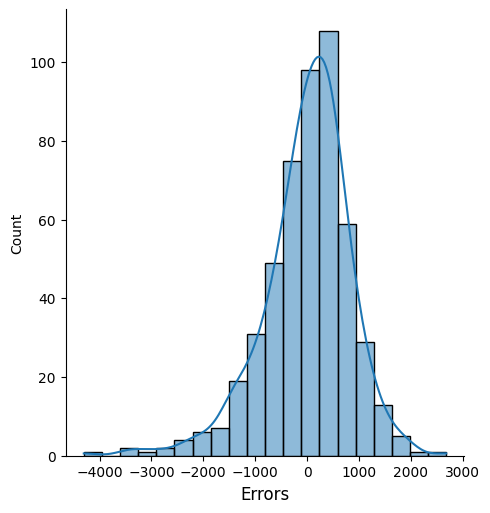

In [64]:
fig = plt.figure(figsize = (8, 5))
sns.displot(y_train - y_train_pred, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

##### Valuable insights
* The error terms, or residuals, are expected to follow a normal distribution curve.

#### Homoscedasticity

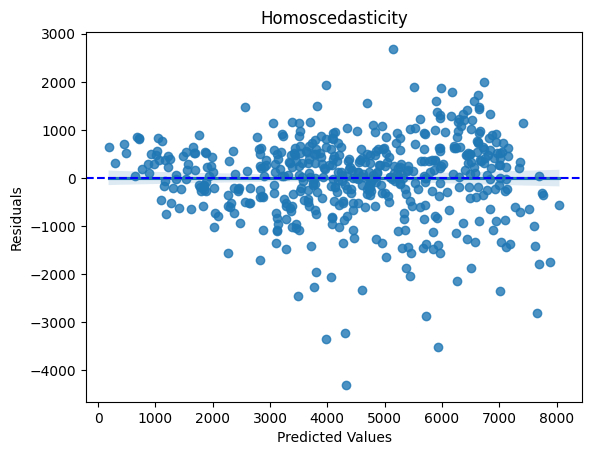

In [66]:
sns.regplot(x = y_train_pred, y = y_train - y_train_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.show()

##### Valuable insights
* Consistent Variability of Residuals

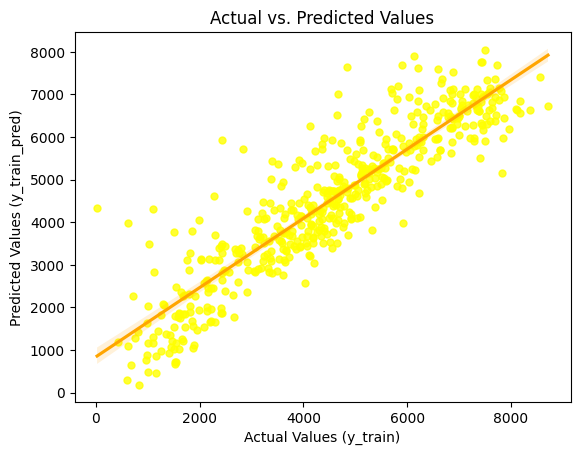

In [67]:
# Visualize the trained model with scatter plot and linear regression fit line
sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'orange'}, scatter_kws={'s': 25, 'color': 'yellow'})

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.show()

In [68]:
# Calculate mean squared 
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(rmse_train)

844.8784197894066


#### Observation: 
**The linear model's assumptions are true which indicates it is traned well and ready.**

### Predictions

In [69]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[selected_features]
X_test_scaled.head()

,yr,temp,hum,windspeed,summer,winter,July,September,Monday
184,-1.01777,1.306004,0.048287,-1.396242,-0.572078,-0.575091,3.478874,-0.295354,-0.408248
535,0.98254,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.287449,-0.295354,-0.408248
299,-1.01777,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.287449,-0.295354,-0.408248
221,-1.01777,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.287449,-0.295354,-0.408248
152,-1.01777,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.287449,-0.295354,-0.408248


In [70]:
# Add constant
X_test_sm = sm.add_constant(X_test_scaled)

In [71]:
y_test_pred = model.predict(X_test_sm)

### Calculating R-squared Scores and Adj. R-squared 

In [72]:
test_r2_score = r2_score(y_true = y_test, y_pred = y_test_pred)
test_r2_score = round(test_r2_score, 3)
test_r2_score

0.801

In [73]:
r2 = r2_score(y_test, y_test_pred)
n = len(y_test)
n_features = len(X_test_scaled.columns)
test_adj_r2_score = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
test_adj_r2_score = round(test_adj_r2_score, 3)
test_adj_r2_score

0.793

In [74]:
# mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

844.2015273557084


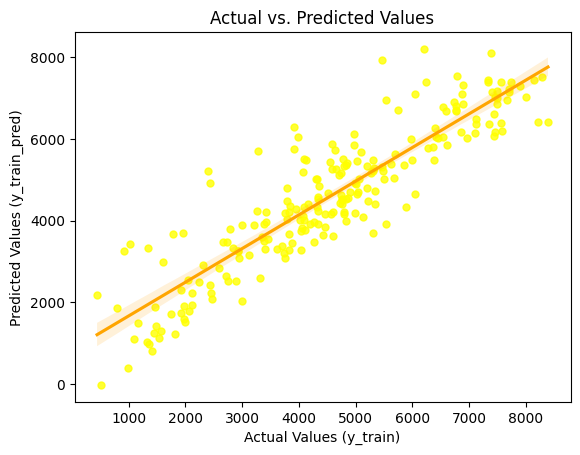

In [75]:
sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'orange'}, scatter_kws={'s': 25, 'color': 'yellow'})

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.show()

In [76]:
# Get R2 Score for Training set
train_r2_score = round(model.rsquared, 2)
train_adj_r2_score = round(model.rsquared_adj, 2)

print(f'Training Set: \tR2 - {format(train_r2_score, ".3f")}\n\t\tAdjusted R2 - {format(train_adj_r2_score, ".3f")}\n')
print(f'Test Set: \tR2 - {format(test_r2_score, ".3f")}\n\t\tAdjusted R2 - {format(test_adj_r2_score, ".3f")}')

Training Set: 	R2 - 0.810
		Adjusted R2 - 0.810

Test Set: 	R2 - 0.801
		Adjusted R2 - 0.793


### Equation of the best fit line

In [77]:
# Coefficients 
round(model.params, 2)

const        4491.30
yr            993.88
temp         1235.10
hum          -438.12
windspeed    -352.05
summer        309.70
winter        506.20
July         -120.52
September     205.06
Monday       -100.90
dtype: float64

#### Equation
**cnt** = 4491.30 + 993.88 x **yr** + 1235.10 x **temp** - 438.12 x **hum** - 352.05 x **windspeed** + 309.70 x **Summer** + 506.20 x **Winter** - 120.52 x **July** + 205.06 x **September** - 100.90 x **Monday**

## Conclusion
The equation of the best fit line is:

**cnt** = 4491.30 + 993.88 x **yr** + 1235.10 x **temp** - 438.12 x **hum** - 352.05 x **windspeed** + 309.70 x **Summer** + 506.20 x **Winter** - 120.52 x **July** + 205.06 x **September** - 100.90 x **Monday**

The R² and adjusted R² values for the training and test sets are very close (R²: 0.810 vs. 0.801 and adjusted R²: 0.810 vs. 0.793) and 
the RMSE values of 844.87 in the training set and 844.201. This means our model is doing a good job of predicting new data, not just memorizing the training data. So, we can expect it to work well on new, unseen data too.

Bike demand is influenced by features such as yr, temp, hum, windspeed, Summer, Winter, July, September, and Monday.

Most significant key feature variables yr, temp, and Winter since it exhibit the highest coefficient values.